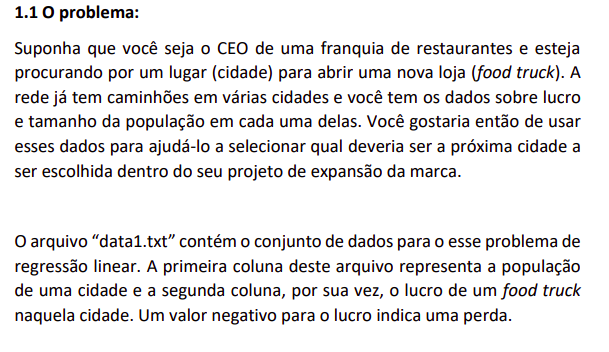

### 1) Coletando o arquivo data1.txt:

In [161]:
import pandas as pd
import numpy as np

filename = '/home/aritana/my_jupyter_notebook/linearRegressionOneMultipleVariables/data1.txt'


data = pd.read_csv(filename,sep=',',header=None).values


#definindo os eixos
x = data[:, 0]
y = data[:, 1]

print(pd.read_csv(filename,sep=',',header=None))

#fonte:http://awesci.com/reading-and-plotting-data-in-jupyter-notebook/

          0         1
0    6.1101  17.59200
1    5.5277   9.13020
2    8.5186  13.66200
3    7.0032  11.85400
4    5.8598   6.82330
..      ...       ...
92   5.8707   7.20290
93   5.3054   1.98690
94   8.2934   0.14454
95  13.3940   9.05510
96   5.4369   0.61705

[97 rows x 2 columns]


### 1) Plotando os dados:

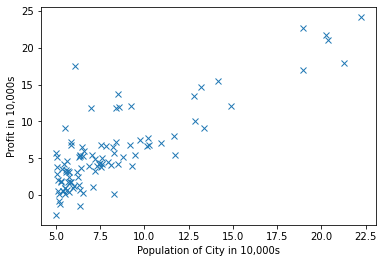

In [162]:
import matplotlib.pyplot as plt

plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in 10,000s")
plt.plot(x,y,'x')
plt.show()

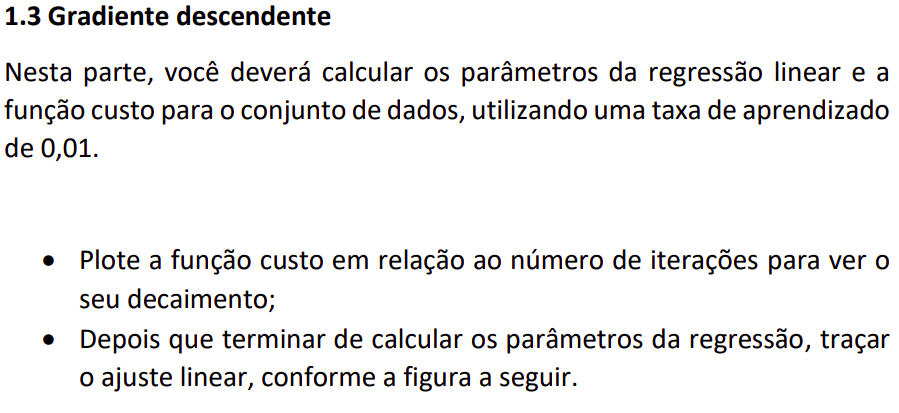

## Fundamentação teórica:
### a) Objetivo: minimizar função custo (Erro médio quadrático)

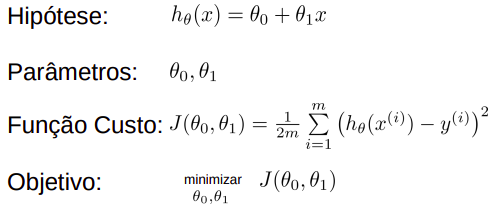

### b) Algoritimo:
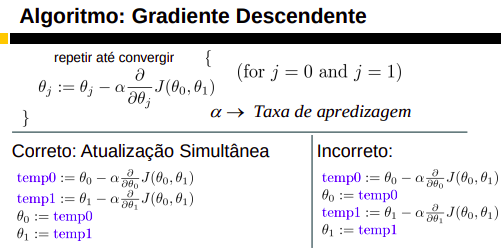

### c)  Definição de alfa e das derivadas da função custo:

#### Alfa: 
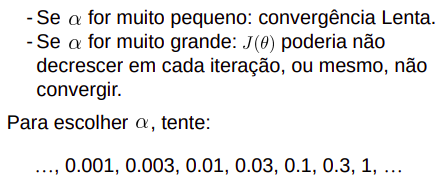
#### derivadas: 
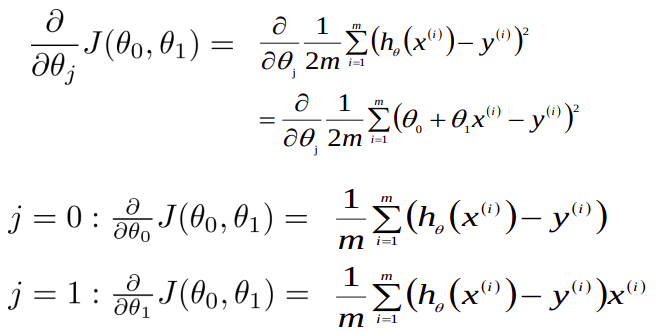


In [217]:
#start with some Teta0 and Teta1, say (0,0)
#keep changing  Teta0 and Teta1, to reduce J(Teta0,Teta1) until end up at a minimum
#Update Teta0 and Teta1 simultaneously

### Derivadas da função custo em relação aos parâmetros

In [222]:
import matplotlib.pyplot as plt


def Dj_dteta0(teta0, teta1, xi, yi, m):
    resultado = 0
    for i in range (m):
        resultado = resultado + (teta0 + teta1 * xi[i] - yi[i])
    return resultado/m
        
def Dj_dteta1(teta0, teta1, xi, yi, m):
    resultado = 0
    for i in range (m):
        resultado = resultado + (teta0 + teta1 * xi[i] - yi[i])* xi[i]
    return resultado/m    

def FuncaoCusto(teta0, teta1, xi, yi, m):
    resultado = 0
    custo = []
    for i in range (m):
        custo.append(((teta0 + teta1 * xi[i]) - yi[i])**2)        
    for i in range (m):    
        resultado = resultado + custo[i]
    return resultado/(2*m)        

def plotGrafico(x,y,h):
    plt.xlabel("Population of City in 10,000s")
    plt.ylabel("Profit in 10,000s")
    plt.plot(x,y,'x',label="Training data")
    plt.plot(x,h,label="Linear regression")   
    plt.legend(loc='upper left', frameon=False)
    plt.show()
    
def plotGraficoFuncaoCusto(teta1,custo):
    plt.grid()
    plt.xlabel("Teta1")
    plt.ylabel("J ( Tteta1 )")
    plt.plot(teta1,custo, label= "Teta1")
    plt.legend(loc='upper left', frameon=False)
    plt.show()    

## Testes das funções declaradas anteriormente.

14.0
32.0
[3, 5, 7]


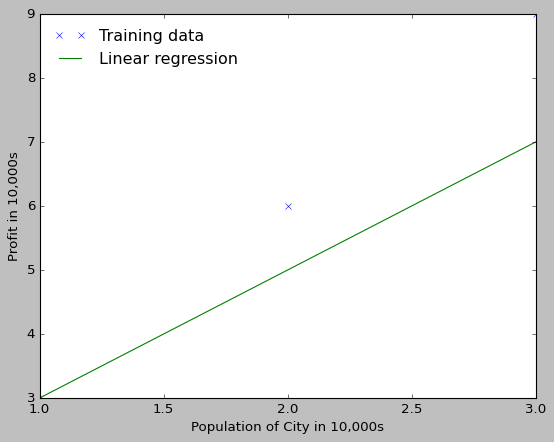

funcao custo para teta = 0: 2.3333333333333335
teta, custo: 1 0.0
teta, custo: 0.5 0.5833333333333334
teta, custo: 0 2.3333333333333335


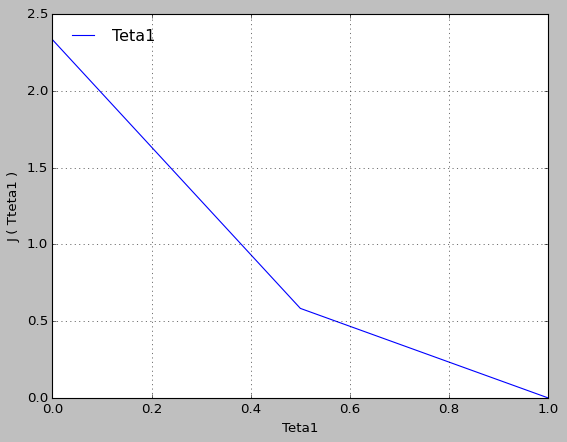

In [223]:
# ESTE ARQUIVO É APENAS PARA TESTE UNITARIO
teta0 = 2
teta1 = 9
xi = [1,2,3]
yi = [3, 6, 9]
m = 3
alfa = 0.01

#Teste das derivadas

dj_dteta0 = Dj_dteta0(teta0, teta1, xi, yi, m)
print(dj_dteta0)

if(round(dj_dteta0,11)!=14.0):
    print("Erro em dj_dteta0")
    

dj_dteta1 = Dj_dteta1(teta0, teta1, xi, yi, m)
print(dj_dteta1)

if(round(dj_dteta1,11)!=32.0):
    print("Erro em dj_dteta1")


#Teste da regressao

#funcao 1 + 2x
hi = []
for i in range (m):
    hi.append(1 + 2 * xi[i])

print(hi)
plotGrafico(xi,yi,hi)

#Teste da funcao custo
xi = [1,2,3]
yi = [1,2,3]
m=3
a =FuncaoCusto(0, 0, xi, yi, m)
print("funcao custo para teta = 0:",a)

#Teste plotar funcao custo
teta1=[1, 0.5, 0]
custo = []
for i in range (m):
    custo.append(FuncaoCusto(0, teta1[i], xi, yi, m))
    print("teta, custo:",teta1[i],custo[i])
plotGraficoFuncaoCusto(teta1,custo)

In [224]:
xi = [1,2,3]
yi = [1,2,3]
m=3
a =FuncaoCusto(0, 0, xi, yi, m)
print(a)

2.3333333333333335


### Execução

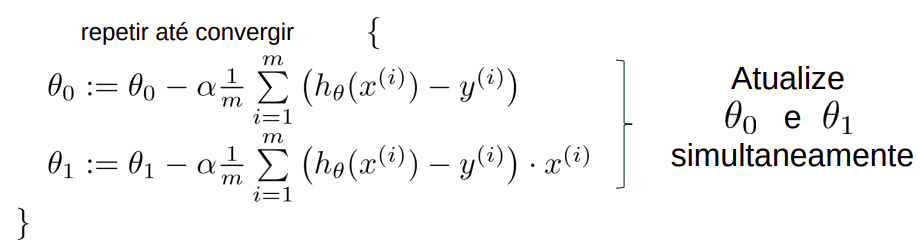

#### A convergência se dá em um mínimo local ou global onde a derivada se anula e os valores de teta0 e teta1 serão sempre constantes, pois não haverá inclinação (derivada nula).

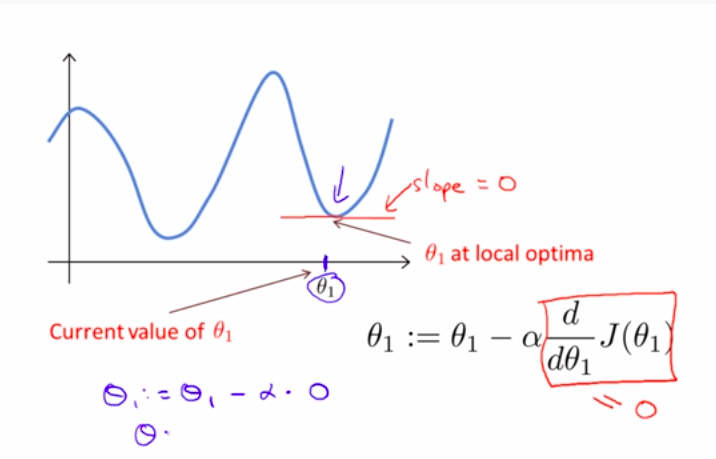

Fonte: https://www.youtube.com/watch?v=YovTqTY-PYY&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN&index=9

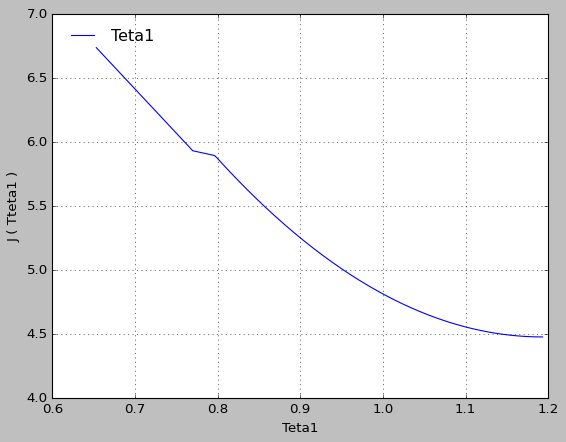

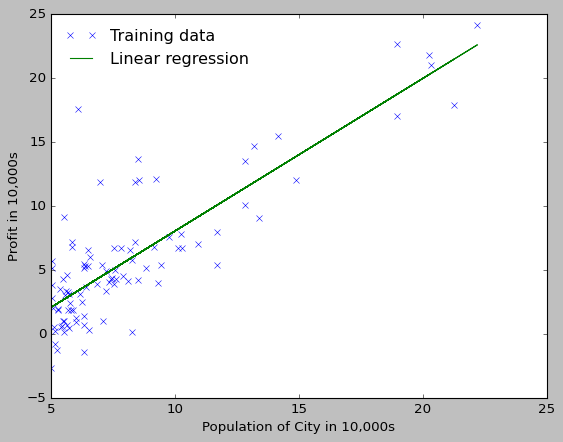

In [225]:
#Definir Valores iniciais
# vetor x e vetor y ja foram definidos anteriormente

x = x #vetorx
y = y #vetory
teta0 = 0
teta1 = 0
alfa = 0.01
m = len(x)
h = []
#para impressao
vetorCusto = []
vetorTeta1 = []

while(1):
    dj_dteta0 = Dj_dteta0(teta0, teta1, x, y, m)
    temp0 = teta0 - alfa * dj_dteta0

    dj_dteta1 = Dj_dteta1(teta0, teta1, x, y, m)
    temp1 = teta1 - alfa * dj_dteta1

    if(temp1 == teta1 ):
        break        
    teta0 = temp0
    teta1 = temp1   

    vetorTeta1.append(teta1)
    vetorCusto.append(FuncaoCusto(teta0, teta1, x, y, m))#atualiza custo

#imprimir grafico do teta1   
plotGraficoFuncaoCusto(vetorTeta1,vetorCusto)

#imprimir grafico da regressão linear
for i in range(m):   
    h.append(teta0 + teta1 * x[i])
plotGrafico(x,y,h)
        


## 1.3 Gradiente descendente: CONCLUSÃO

#### O gráfico da variação da função de custo, que é o erro médio quadrático, em relação a Teta 01 evidencia que através do método do gradiente descendente, foi obtido, a um teta0 qualquer, um teta01 que minimizasse a fução custo. 
#### Foi definido no código que quando Teta01 parasse de variar, característica de derivada nula, fosse o ponto de parada.

#### Com posse dessas informações no gráfico "population x profit" acima, foi evidenciada reta de regressão linear teta0 + teta1 * x que melhor se adequa aos dados do treinamento.